t_norm =  3.291059787202448e-11 w_norm =  30385348934.971672


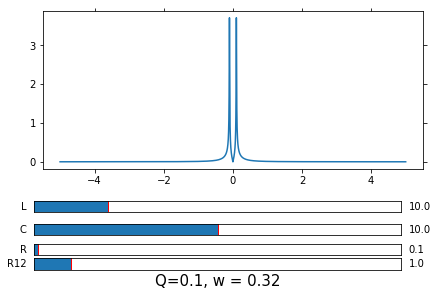

In [2]:
import numpy as np

import matplotlib.pyplot as plt

# !!! Импортируем класс кнопки и слайдера
from matplotlib.widgets import TextBox, Slider

# Определим нормировочный ток, через который задаются все остальные величины

I_norm = 0.125*10**(-3)
Phi_0 = 2.06783385*10**(-15)

# параметры JJ
V_u = 0.01*10**(-3)
I_c = 0.125*10**(-3)
R = V_u/I_c

I_norm_c = I_c/I_norm
V_norm = I_c*R
R_norm = V_norm/I_norm
t_norm = (Phi_0/(2*np.pi))*(1/V_norm)
w_norm = 1/t_norm
C_norm = (Phi_0/(2*np.pi)) * 1/(V_norm*R_norm)
L_norm = (Phi_0/(2*np.pi)) * 1/I_norm

print("t_norm = ",t_norm,"w_norm = ",w_norm)

def gauss(l, c, r,r_12,i_c, w):
    '''Отображаемая фукнция K(w)'''
    return np.abs(w) *(1 / i_c) / np.sqrt(
        r_12 ** 2 + (1 / i_c) ** 2 * w ** 2) * 1 / np.sqrt(
        (1 - l * c * w ** 2) ** 2 + (w * c * r) ** 2)
    #return np.abs(w)*L_norm*(1/i_c)/np.sqrt(r_12**2*R_norm**2 + (1/i_c)**2*L_norm**2*w**2)*1/np.sqrt((1-l*c*L_norm*C_norm*w**2)**2 + (w*c*r*C_norm*R_norm)**2)


if __name__ == '__main__':
    def updateGraph():
        '''Обработчик события для кнопки "Добавить"'''
        # !!! Будем использовать sigma и mu, установленные с помощью слайдеров
        global slider_L
        global slider_R
        global slider_C
        global slider_R_12

        global graph_axes

        # !!! Используем атрибут val, чтобы получить значение слайдеров
        l = slider_L.val
        r = slider_R.val
        c = slider_C.val
        r_12 = slider_R_12.val
        i_c = 0.25

        Q = R_norm * C_norm / np.sqrt(L_norm * C_norm) * r*c/np.sqrt(l*c)
        Omega = np.sqrt(2.07*10**(-15)*C_norm*c/(2*np.pi*I_norm)) * 1/np.sqrt(L_norm*C_norm * c*l)

        G = np.sqrt(2.07*10**(-15)/(2*np.pi*I_norm*R_norm*C_norm*c))
        x = np.arange(-5, 5, 10**(-3))
        y = gauss(l, c, r, r_12,i_c,x)


        graph_axes.clear()

        graph_axes.plot(x, y)

        plt.xlabel(f'Q={np.round(Q,2)}, w = {np.round(Omega,2)}',fontsize=15)

        plt.draw()

    def onChangeValue(value):
        '''!!! Обработчик события изменения значений слайдеров'''
        updateGraph()

    # Создадим окно с графиком
    fig, graph_axes = plt.subplots()
    graph_axes.grid()

    # Оставим снизу от графика место для виджетов
    fig.subplots_adjust(left=0.07, right=0.95, top=0.95, bottom=0.4)


    # !!! L
    axes_slider_L = plt.axes([0.05, 0.25, 0.85, 0.04])
    slider_L = Slider(axes_slider_L,
                          label='L',
                          valmin=0.0,
                          valmax=50.0,
                          valinit=10.0,
                          valfmt='%1.1f')
    slider_L.on_changed(onChangeValue)

    # !!! C
    axes_slider_C = plt.axes([0.05, 0.17, 0.85, 0.04])
    slider_C = Slider(axes_slider_C,
                          label='C',
                          valmin=0.0,
                          valmax=20.0,
                          valinit=10.0,
                          valfmt='%1.1f')
    slider_C.on_changed(onChangeValue)

    # !!! R
    axes_slider_R = plt.axes([0.05, 0.10, 0.85, 0.04])
    slider_R = Slider(axes_slider_R,
                          label='R',
                          valmin=0.0,
                          valmax=10.0,
                          valinit=0.1,
                          valfmt='%1.1f')
    slider_R.on_changed(onChangeValue)

    # !!! R_12
    axes_slider_R_12 = plt.axes([0.05, 0.05, 0.85, 0.04])
    slider_R_12 = Slider(axes_slider_R_12,
                          label='R12',
                          valmin=0.0,
                          valmax=10.0,
                          valinit=1,
                          valfmt='%1.1f')
    slider_R_12.on_changed(onChangeValue)


    updateGraph()

    plt.show()